# Training regression models for unhealthy brain tissue using 55/100 CpG sites

- This workbook trains the linear, lasso and ridge regression models for the Alzheimer's and Huntington's cohorts using the 55/100 shared CpG sites from the HC brain XGBoost list
- Data used was created in thebrain_applying_hc_models.ipynb notebook and saved as alz_55_no_na.csv and hunt_55_no_na.csv


In [1]:
import _pickle as cPickle
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from xgboost import XGBRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

### Reading in data

In [2]:
huntingtons_df=pd.read_csv('hunt_55_no_na.csv',index_col=0)  

In [3]:
alzheimers_df=pd.read_csv('alz_55_no_na.csv',index_col=0)  

### Defining the models

In [4]:
def lassoCV_regress(X_train,  X_test, y_train,y_test, plot=True, xmin=50,xmax=100,alphas=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5],cv=5):

    #Build fit model
    mod = mod = LassoCV(alphas=alphas,cv=cv)
    mod.fit(X_train, y_train)
    
    # Make predictions and evaluate
    preds_train = mod.predict(X_train)
    preds_test = mod.predict(X_test)
    rms_train = (mean_squared_error(y_train, preds_train))**0.5
    rms_test = (mean_squared_error(y_test, preds_test))**0.5
    r2_train = r2_score(y_train, preds_train)
    r2_test = r2_score(y_test, preds_test)
    
    # Plot final true vs predicted age
    if plot:
        fig, ax = plt.subplots(1,2, figsize=(15,4))
        ax[1].scatter(y_train, preds_train, alpha=0.5)
        ax[1].plot(range(xmin,xmax), range(xmin,xmax), c='red')
        ax[1].set_xlabel('True Age')
        ax[1].set_ylabel('Predicted Age')
        ax[1].grid(True, lw=1.5, ls='--', alpha=0.75)
        ax[1].set_title('Lasso Regression on training data')

        ax[0].scatter(y_test, preds_test, alpha=0.5)
        ax[0].plot(range(xmin,xmax), range(xmin,xmax), c='red')
        ax[0].set_xlabel('True Age')
        ax[0].set_ylabel('Predicted Age')
        ax[0].grid(True, lw=1.5, ls='--', alpha=0.75)
        ax[0].set_title('Lasso Regression on testing data')
        plt.show()
    
    # print metric
    print(f'The rms on the training data is {rms_train:.3f} years')
    print(f'The rms on the testing data is {rms_test:.3f} years')
    print(f'The r^2 on the training data is {r2_train:.3f}')
    print(f'The r^2 on the testing data is {r2_test:.3f}')
    
    return mod, rms_train, rms_test, r2_train, r2_test

In [5]:
def linear_regress(X_train,  X_test, y_train, y_test, plot=True,xmin=50,xmax=100):
    
    #Build fit model
    mod = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs='None')
    mod.fit(X_train, y_train)
    
    # Make predictions and evaluate
    preds_train = mod.predict(X_train)
    preds_test = mod.predict(X_test)
    rms_train = sqrt(mean_squared_error(y_train, preds_train))
    rms_test = sqrt(mean_squared_error(y_test, preds_test))
    r2_train = r2_score(y_train, preds_train)
    r2_test = r2_score(y_test, preds_test)
    
    # Plot progress over epochs and final true vs predicted age
    if plot:
        fig, ax = plt.subplots(1,2, figsize=(25,6))
        ax[1].scatter(y_train, preds_train, alpha=0.5)
        ax[1].plot(range(xmin,xmax), range(xmin,xmax), c='red')
        ax[1].set_xlabel('True Age')
        ax[1].set_ylabel('Predicted Age')
        ax[1].grid(True, lw=1.5, ls='--', alpha=0.75)
        ax[1].set_title('Linear Regression on training data')

        ax[0].scatter(y_test, preds_test, alpha=0.5)
        ax[0].plot(range(xmin,xmax), range(xmin,xmax), c='red')
        ax[0].set_xlabel('True Age')
        ax[0].set_ylabel('Predicted Age')
        ax[0].grid(True, lw=1.5, ls='--', alpha=0.75)
        ax[0].set_title('Linear Regression on testing data')
        plt.show()
    
    # print metric
    print(f'The rms on the training data is {rms_train:.3f} years')
    print(f'The rms on the testing data is {rms_test:.3f} years')
    print(f'The r^2 on the training data is {r2_train:.3f}')
    print(f'The r^2 on the testing data is {r2_test:.3f}')
    
    return mod, rms_train, rms_test, r2_train, r2_test

In [16]:
def ridge_regress(X_train,  X_test, y_train,y_test, plot=True, xmin=50,xmax=100,alphas=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5],cv=5):

    #Build fit model
    mod = Ridge()
    mod.fit(X_train, y_train)
    
    # Make predictions and evaluate
    preds_train = mod.predict(X_train)
    preds_test = mod.predict(X_test)
    rms_train = (mean_squared_error(y_train, preds_train))**0.5
    rms_test = (mean_squared_error(y_test, preds_test))**0.5
    r2_train = r2_score(y_train, preds_train)
    r2_test = r2_score(y_test, preds_test)
    
    # Plot final true vs predicted age
    if plot:
        fig, ax = plt.subplots(1,2, figsize=(15,4))
        ax[1].scatter(y_train, preds_train, alpha=0.5)
        ax[1].plot(range(xmin,xmax), range(xmin,xmax), c='red')
        ax[1].set_xlabel('True Age')
        ax[1].set_ylabel('Predicted Age')
        ax[1].grid(True, lw=1.5, ls='--', alpha=0.75)
        ax[1].set_title('Lasso Regression on training data')

        ax[0].scatter(y_test, preds_test, alpha=0.5)
        ax[0].plot(range(xmin,xmax), range(xmin,xmax), c='red')
        ax[0].set_xlabel('True Age')
        ax[0].set_ylabel('Predicted Age')
        ax[0].grid(True, lw=1.5, ls='--', alpha=0.75)
        ax[0].set_title('Ridge Regression on testing data')
        plt.show()
    
    # print metric
    print(f'The rms on the training data is {rms_train:.3f} years')
    print(f'The rms on the testing data is {rms_test:.3f} years')
    print(f'The r^2 on the training data is {r2_train:.3f}')
    print(f'The r^2 on the testing data is {r2_test:.3f}')
    
    return mod, rms_train, rms_test, r2_train, r2_test

## Alzheimer's

### Test-train split

In [7]:
X_alz = alzheimers_df.iloc[:, 1:].to_numpy()
y_alz = alzheimers_df[['AGE']].astype(float).astype(int)
X_train_alz, X_test_alz, Y_train_alz, Y_test_alz = train_test_split(X_alz, y_alz, test_size=0.3, random_state = 4, shuffle=True)

### Linear 

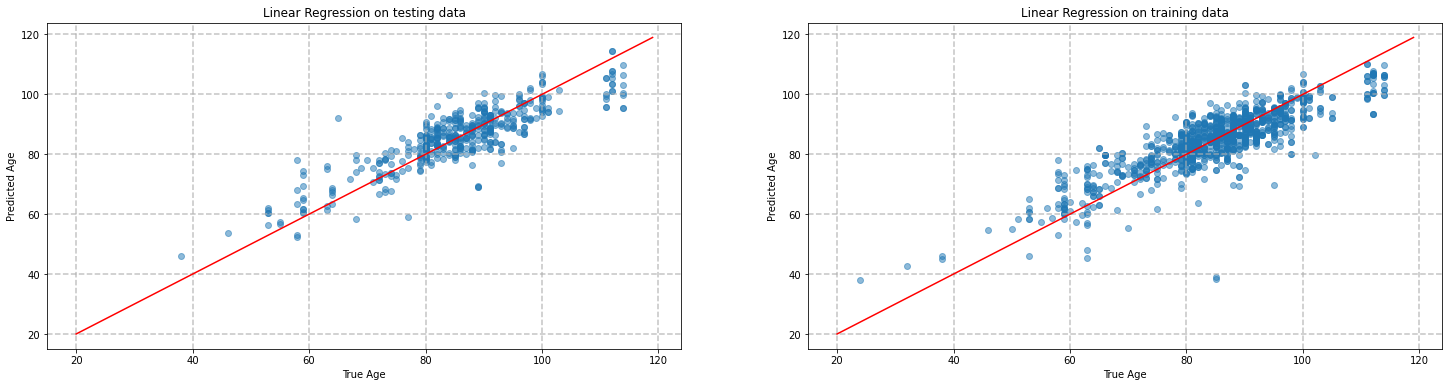

The rms on the training data is 6.387 years
The rms on the testing data is 6.075 years
The r^2 on the training data is 0.720
The r^2 on the testing data is 0.748


(LinearRegression(n_jobs='None'),
 6.386526162202683,
 6.074682663376773,
 0.7203134004253785,
 0.7478267364065481)

In [9]:
linear_regress(X_train_alz, X_test_alz, Y_train_alz, Y_test_alz,xmin=20,xmax=120)

### Lasso 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


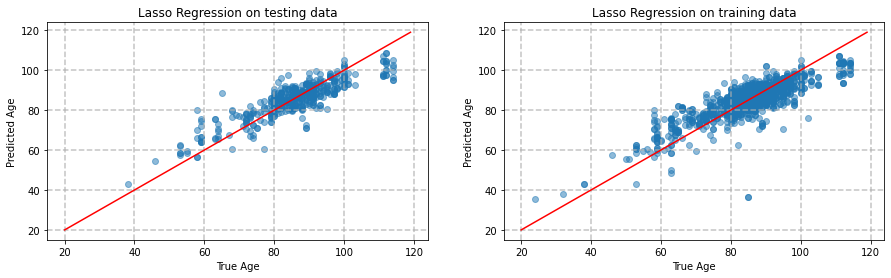

The rms on the training data is 6.633 years
The rms on the testing data is 6.072 years
The r^2 on the training data is 0.698
The r^2 on the testing data is 0.748


(LassoCV(alphas=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0,
                 10000.0, 100000.0],
         cv=5),
 6.6326439511201,
 6.0715145537133415,
 0.6983414518377107,
 0.7480896980361063)

In [10]:
lassoCV_regress(X_train_alz, X_test_alz, Y_train_alz, Y_test_alz,xmin=20,xmax=120)

### Ridge

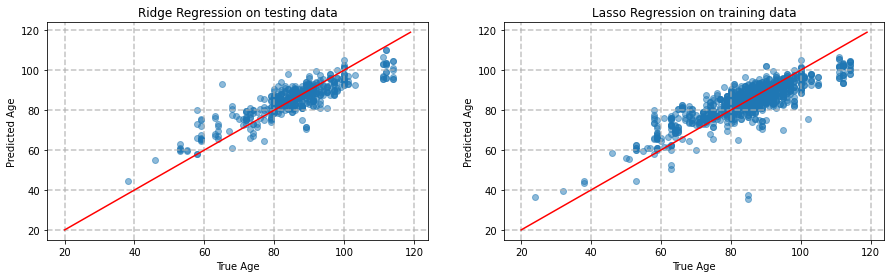

The rms on the training data is 6.716 years
The rms on the testing data is 6.177 years
The r^2 on the training data is 0.691
The r^2 on the testing data is 0.739


(Ridge(),
 6.716301641577143,
 6.177397269071633,
 0.6906838090879847,
 0.7392268270751403)

In [18]:
ridge_regress(X_train_alz, X_test_alz, Y_train_alz, Y_test_alz,xmin=20,xmax=120)

## Huntington's

### Test-train split

In [12]:
X_park = huntingtons_df.iloc[:, 1:].to_numpy()
y_park = huntingtons_df[['AGE']].astype(float).astype(int)
X_train_park, X_test_park, Y_train_park, Y_test_park = train_test_split(X_park, y_park, test_size=0.3, random_state = 4, shuffle=True)

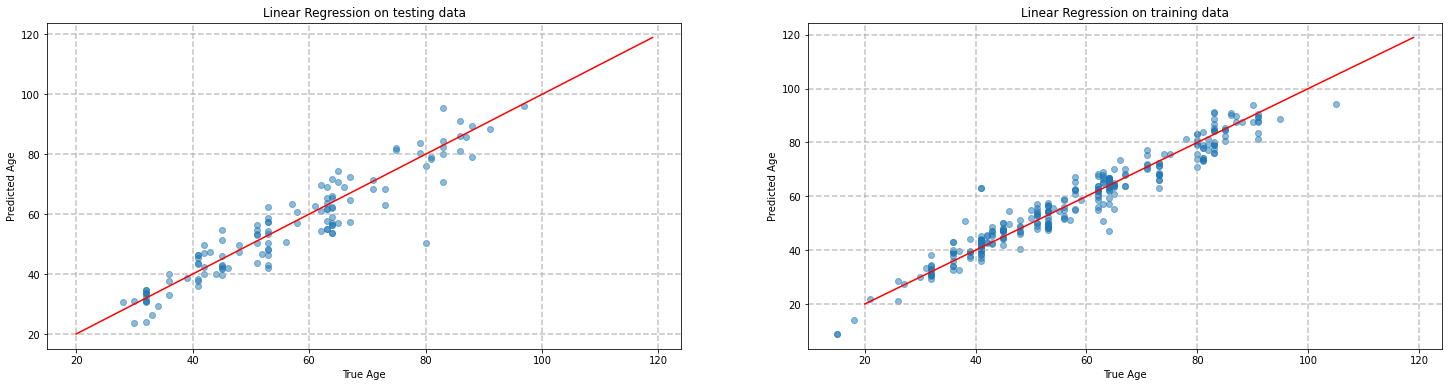

The rms on the training data is 4.422 years
The rms on the testing data is 5.792 years
The r^2 on the training data is 0.938
The r^2 on the testing data is 0.880


(LinearRegression(n_jobs='None'),
 4.421899445768233,
 5.792125535331309,
 0.938211595748522,
 0.8801563768486935)

In [13]:
linear_regress(X_train_park, X_test_park, Y_train_park, Y_test_park,xmin=20,xmax=120)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


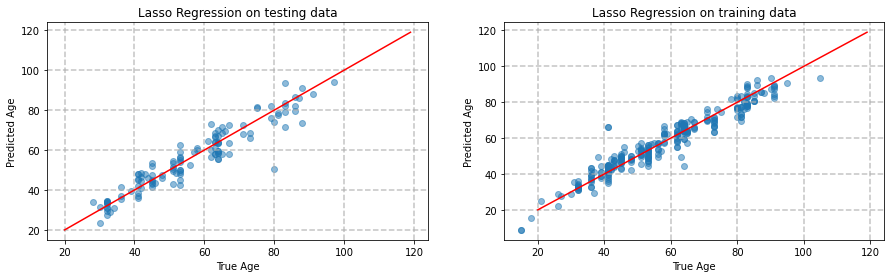

The rms on the training data is 4.738 years
The rms on the testing data is 5.426 years
The r^2 on the training data is 0.929
The r^2 on the testing data is 0.895


(LassoCV(alphas=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0,
                 10000.0, 100000.0],
         cv=5),
 4.738399015088422,
 5.426394116166411,
 0.9290499814999577,
 0.8948130979082838)

In [14]:
lassoCV_regress(X_train_park, X_test_park, Y_train_park, Y_test_park,xmin=20,xmax=120)

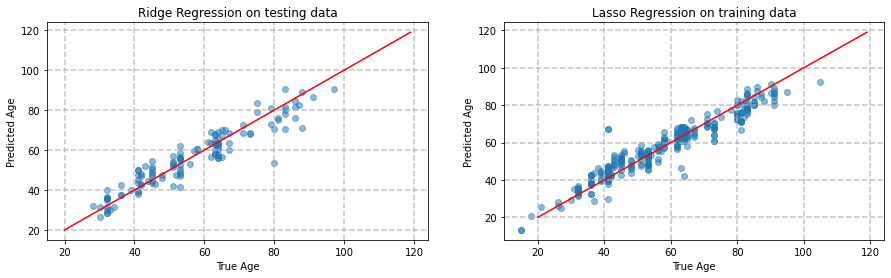

The rms on the training data is 5.292 years
The rms on the testing data is 5.596 years
The r^2 on the training data is 0.911
The r^2 on the testing data is 0.888


(Ridge(),
 5.292382396589782,
 5.596384923385931,
 0.9114901332824938,
 0.8881195629441543)

In [17]:
ridge_regress(X_train_park, X_test_park, Y_train_park, Y_test_park,xmin=20,xmax=120)